In [66]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

### Define model architecture

In [67]:
def build_model(height, width, channels):
    # Define an autoencoder model for style transfer
    model = models.Sequential()

    # Encoder
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(height, width, channels)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Decoder
    model.add(layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))

    # Output layer
    model.add(layers.Conv2D(channels, (3, 3), activation='sigmoid', padding='same'))

    return model

### Define content loss

In [68]:
def content_loss(content, reconstructed):
    # Calculate mean squared error between content and reconstructed content
    return tf.reduce_mean(tf.square(content - reconstructed))

### Define style loss

In [69]:
def style_loss(style, reconstructed):
    return tf.reduce_mean(tf.square(style - reconstructed))

### Load and preprocess images

In [70]:
def load_and_preprocess_image(image_path, target_size=(256, 256)):
    # Load and preprocess image for the model
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0,1]
    return img_array

### Create a function to apply style transfer

In [71]:
def style_transfer(content_path, style_path, num_epochs=10, alpha=1e-2, beta=1, learning_rate=1e-2):
    # Load content and style images, build model, and perform style transfer
    content_image = load_and_preprocess_image(content_path)
    style_image = load_and_preprocess_image(style_path)

    height, width, channels = content_image.shape[1:]

    model = build_model(height, width, channels)
    optimizer = optimizers.Adam(learning_rate=learning_rate)

    # Train the model for one epoch and print the total loss
    for epoch in range(num_epochs):
        loss = train_step(content_image, style_image, model, optimizer, alpha, beta)
        print(f"Epoch {epoch + 1}/{num_epochs}, Total Loss: {loss.numpy()}")

        # Display intermediate results every 5 epochs
        if (epoch + 1) % 5 == 0:
            stylized_image = model.predict(content_image)
            stylized_image = np.clip(stylized_image[0], 0, 1)
            display_images(content_image[0], style_image[0], stylized_image)

### Training step

In [72]:
def train_step(content_image, style_image, model, optimizer, alpha, beta):
    # Perform one training step and calculate content and style losses
    with tf.GradientTape() as tape:
        content_features = model(content_image, training=True)
        style_features = model(style_image, training=True)

        reconstructed_content = model(content_image, training=True)
        reconstructed_style = model(style_image, training=True)

        loss_content = content_loss(content_features, reconstructed_content)
        loss_style = style_loss(style_features, reconstructed_style)

        # Combine content and style losses using weights alpha and beta
        total_loss = alpha * loss_content + beta * loss_style

    # Compute gradients and apply them using the optimizer
    gradients = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    print(f"Content Loss: {loss_content.numpy()}, Style Loss: {loss_style.numpy()}")



    return total_loss

### Result

In [73]:
def display_images(content, style, stylized):
    plt.figure(figsize=(20, 8))

    plt.subplot(1, 3, 1)
    plt.imshow(content)
    plt.title('Content Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(style)
    plt.title('Style Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(stylized)
    plt.title('Stylized Image')
    plt.axis('off')

    plt.show()

### Example

Content Loss: 0.0, Style Loss: 0.0
Epoch 1/10, Total Loss: 0.0
Content Loss: 0.0, Style Loss: 0.0
Epoch 2/10, Total Loss: 0.0
Content Loss: 0.0, Style Loss: 0.0
Epoch 3/10, Total Loss: 0.0
Content Loss: 0.0, Style Loss: 0.0
Epoch 4/10, Total Loss: 0.0
Content Loss: 0.0, Style Loss: 0.0
Epoch 5/10, Total Loss: 0.0
1/1 [==============================] - 0s 169ms/step


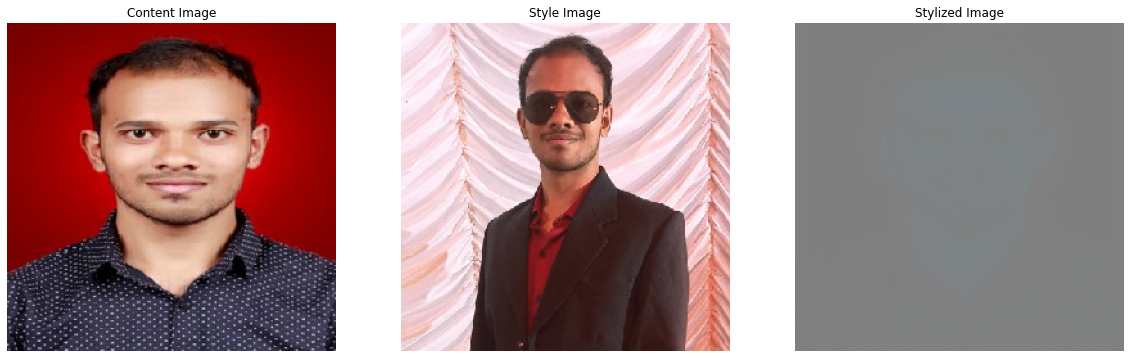

Content Loss: 0.0, Style Loss: 0.0
Epoch 6/10, Total Loss: 0.0
Content Loss: 0.0, Style Loss: 0.0
Epoch 7/10, Total Loss: 0.0
Content Loss: 0.0, Style Loss: 0.0
Epoch 8/10, Total Loss: 0.0
Content Loss: 0.0, Style Loss: 0.0
Epoch 9/10, Total Loss: 0.0
Content Loss: 0.0, Style Loss: 0.0
Epoch 10/10, Total Loss: 0.0
1/1 [==============================] - 0s 90ms/step


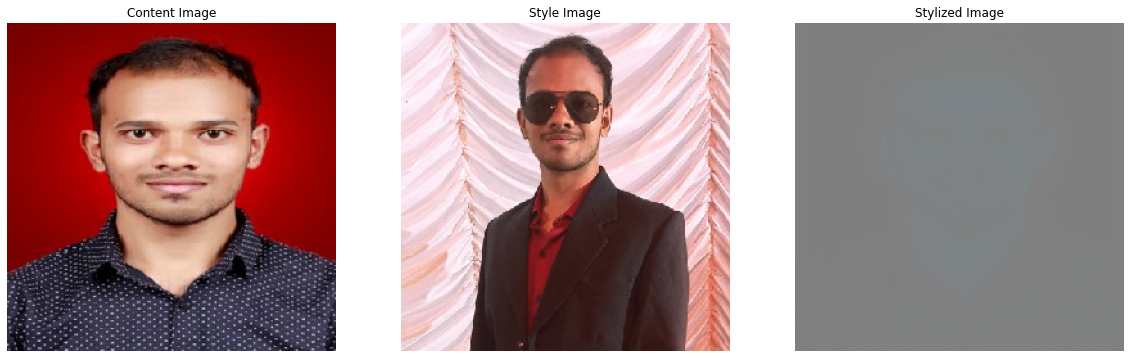

In [74]:
style_transfer(r"D:\Documents\Official\passport19.jpg", r"D:\Documents\Official\1613287449585.jfif", num_epochs=10)

### Limitations and Potential Improvements

Both the Content loss and style loss are 0 in every epoch, this is because this model is not training well.<br>
We can change the optimizers and activation functions for the better results. <br>
Also we can tune the hyperparameters like num_epochs, alpha, beta, and learning_rate according to our preferences.